# Modelling Perceptual Organization in Abstract Art Using Eye Tracking Data (Pre-Test)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'study-modelling_perceptual_organization_in_abstract_art_using_eye_tracking_data-fa93c38a-c549-4ba4-955f-4f5bc89c0ea4-fixations.csv') # Get Fixations
df = df.drop(columns=['notes', 'tester_display_name', 'tester_external_id','tester_item_answer', 'item_id', 'item_question'], axis=1) # Drop columns not needed
print(df)

In [3]:
participants = df['tester_id'].unique().tolist() # Get participant list
print(participants)

prints = df['item_filename'].unique().tolist() #Get art print list
print(prints)

grouped = df.groupby(df['tester_id']) # Group gaze data per participant

['b64f163c-5bba-48cc-bfb9-8ec8ab4e04c2', '9274651b-6309-41fc-bfa5-d5b65fb6e558', 'b6962f63-488d-4702-9a5f-ec31feef48c8']
['Untitled_6_x500.jpg', 'Untitled_8_500x.jpg', 'Untitled_9_500x.jpg', 'Untitled_10_x500.jpg', 'Untitled_12_500x.jpg', 'Untitled_13_500x.jpg']


Participant ID: b64f163c-5bba-48cc-bfb9-8ec8ab4e04c2
Art Print Filename: Untitled_6_x500.jpg


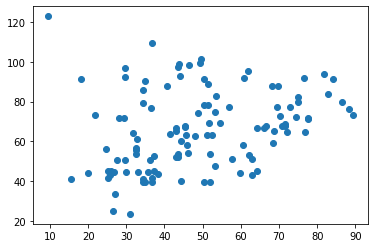

Art Print Filename: Untitled_8_500x.jpg


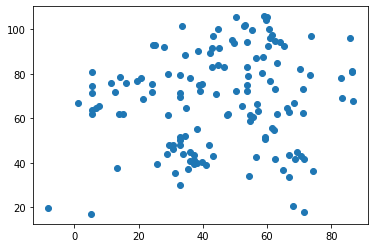

Art Print Filename: Untitled_9_500x.jpg


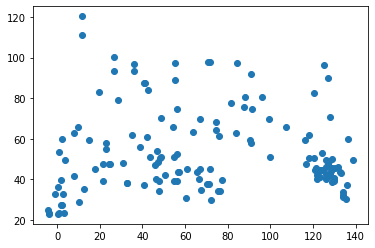

Art Print Filename: Untitled_10_x500.jpg


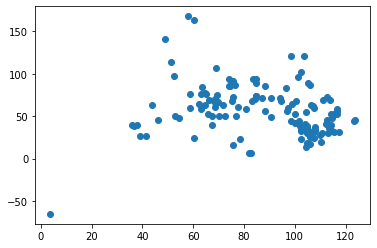

Art Print Filename: Untitled_12_500x.jpg


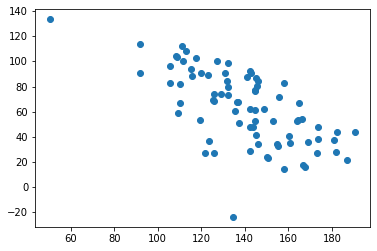

Art Print Filename: Untitled_13_500x.jpg
No Artprint data for Untitled_13_500x.jpg


Participant ID: 9274651b-6309-41fc-bfa5-d5b65fb6e558
Art Print Filename: Untitled_6_x500.jpg


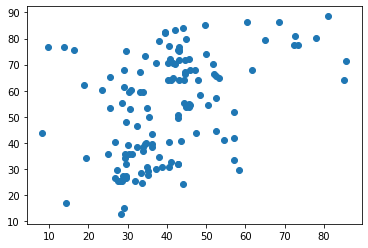

Art Print Filename: Untitled_8_500x.jpg


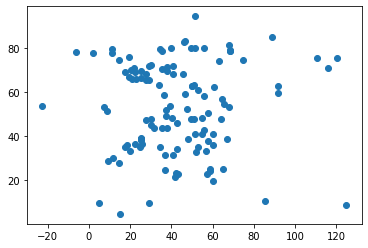

Art Print Filename: Untitled_9_500x.jpg


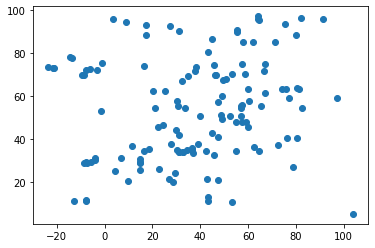

Art Print Filename: Untitled_10_x500.jpg


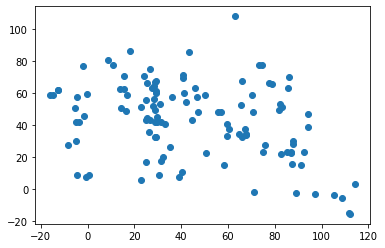

Art Print Filename: Untitled_12_500x.jpg


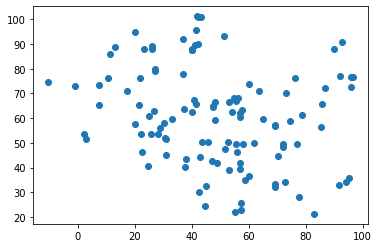

Art Print Filename: Untitled_13_500x.jpg


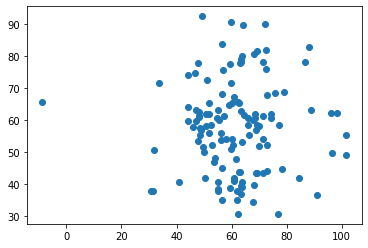



Participant ID: b6962f63-488d-4702-9a5f-ec31feef48c8
Art Print Filename: Untitled_6_x500.jpg


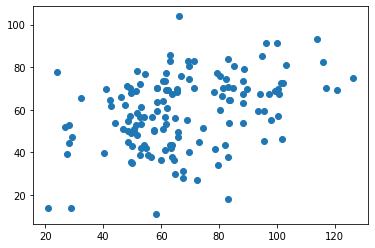

Art Print Filename: Untitled_8_500x.jpg


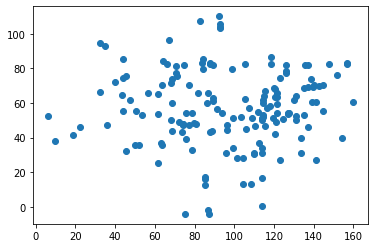

Art Print Filename: Untitled_9_500x.jpg


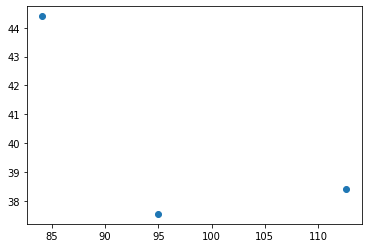

Art Print Filename: Untitled_10_x500.jpg


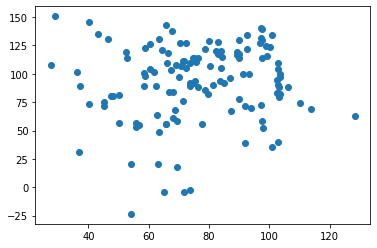

Art Print Filename: Untitled_12_500x.jpg


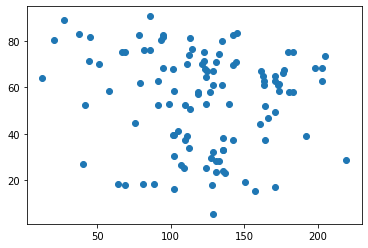

Art Print Filename: Untitled_13_500x.jpg


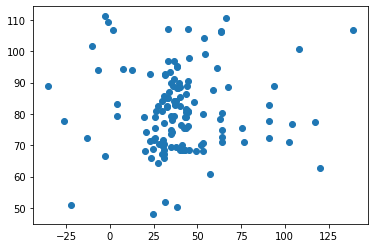

In [35]:
for x in participants:
    print("Participant ID: {}".format(x))
    participant_data = grouped.get_group(x) # Get values for the participant
    participant_data_per_artprint = participant_data.groupby(participant_data['item_filename']) # Group gaze data per participant
    
    for artprint in prints:
        img = plt.imread("Resized/{}".format(artprint))
        #             plt.imshow(img, zorder=0, extent=[0.5, 8.0, 1.0, 7.0]) # Get image of artprint as plot background
        print( "Art Print Filename: {}".format(artprint))
        try:
            participant_artprint_data = participant_data_per_artprint.get_group(artprint) # Get participant fixations for art print
            x_fixations = participant_artprint_data['fixation_point_x']
            y_fixations = participant_artprint_data['fixation_point_y']
            plt.scatter(x_fixations, y_fixations, zorder=1)
            plt.show() # Show fixations of participant for each art print
        except:
            print("No Artprint data for {}".format(artprint))
    
    print("\n")

In [36]:
# OPTICS sample code
from sklearn.cluster import OPTICS
import numpy as np
X = np.array([[1, 2], [2, 5], [3, 6],
              [8, 7], [8, 8], [7, 3]])
clustering = OPTICS(min_samples=2).fit(X)
clustering.labels_

array([0, 0, 0, 1, 1, 1])